In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu


In [81]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df = df.sort_values(1, ascending=False).reset_index(drop=True)



In [82]:
# data = df.head(1000)
data = df # .sample(25000)
# data = df.copy()
data.index = data['seq']
data.index = data.index.astype(str).str[40:]
del data['seq']

In [83]:
data.index.value_counts()

TATTCCATGTAGACCGGCCATTGGACTATG    1
TGGGGGCCGCGTGCCTGTTCTGTGGCTCCT    1
TGGGGGAAGTGGGAAAGGCCTAGGATGCGA    1
AATGATGGTGTACCTTCGGATCAGTGGCAA    1
AATGATGGTGGTTTGGGCGAGATTCTTTTC    1
                                 ..
ATTCCGCATAGCCAGGTGGCCAGATGCCGT    1
ATTCGTAAGTCCGGGTCTATATTGACTCTG    1
ACTATTGAGGGGGCGCTCAAGTCTTCAGCA    1
ATACAAATGAAATAAGTCTCCATTCCTTCT    1
GCCTTTAAAGCGCTTTAGCATTAAAACGTT    1
Name: seq, Length: 120096, dtype: int64

In [84]:
data = data.sample(data.shape[0], random_state=100)

In [85]:
set(data[0])

{0, 1, 2}

In [86]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [87]:
# TODO: skipped for now
n_rounds = 1

print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=512,                         
                         shuffle=True)

loading object (# entries) 120096


In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import numpy as np



##NEW JOB
ignore kernel 1
next w 14 <class 'int'>
# rounds 1
# batches 1
# enr_series True

Kernel to optimize 0

FREEZING KERNELS
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0


before kernel optimization.


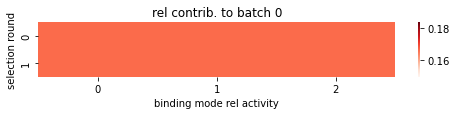


#activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], requires_grad=True)


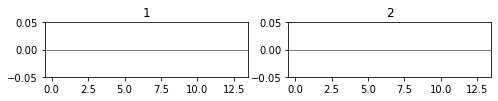

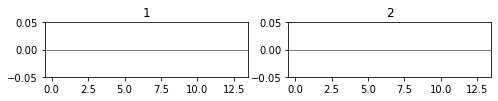

kernels mask [0 1 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 10 early_stopping 100
lr= 0.01, weight_decay= 0.01, dir weight= 0
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512,

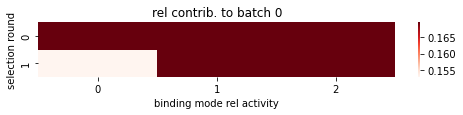


#activities
[[[0.99991006 0.90302694]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.1020, -0.1020]], requires_grad=True)


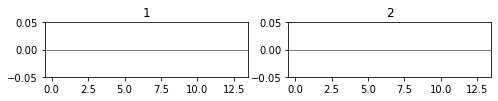

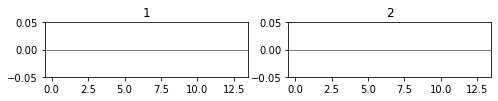

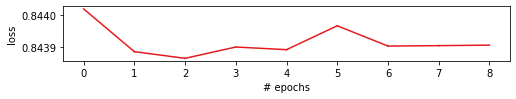

after shift optimz model


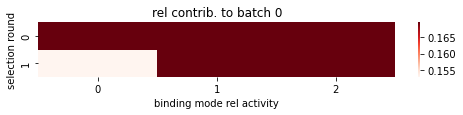


#activities
[[[0.99991006 0.90302694]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.1020, -0.1020]], requires_grad=True)


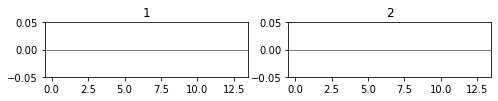

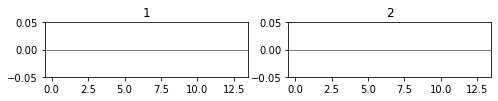

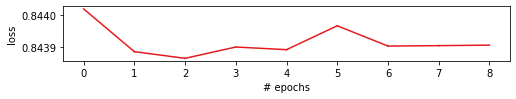



Kernel to optimize 1

FREEZING KERNELS
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
setting grad status of kernel at 2 to 0


before kernel optimization.


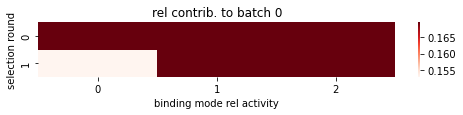


#activities
[[[0.99991006 0.90302694]
  [1.         1.        ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.1020, -0.1020]], requires_grad=True)


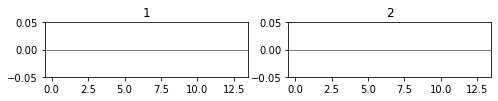

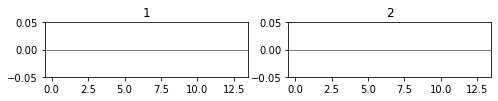

kernels mask [0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 10 early_stopping 100
lr= 0.01, weight_decay= 0.001, dir weight= 0
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512

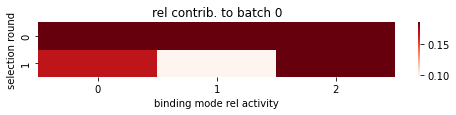


#activities
[[[0.99991006 0.90302694]
  [1.0000174  0.5295915 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.9471, -0.9471]], requires_grad=True)


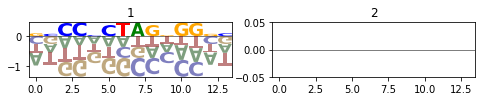

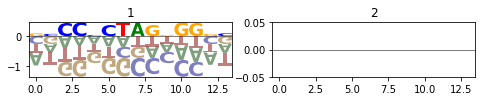

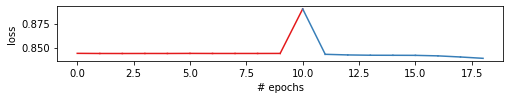

after shift optimz model


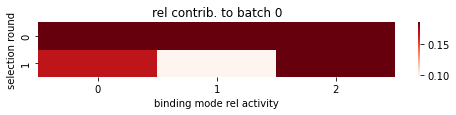


#activities
[[[0.99991006 0.90302694]
  [1.0000174  0.5295915 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 0.9471, -0.9471]], requires_grad=True)


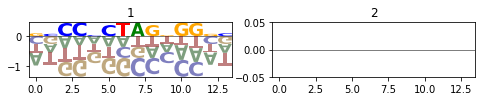

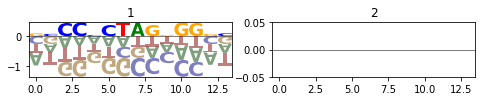

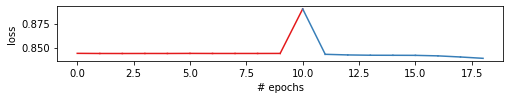




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 

kernels mask [0 0 1]
kernels mask [0 0 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 10 early_stopping 100
lr= 0.01, weight_decay= 0.001, dir weight= 0
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([

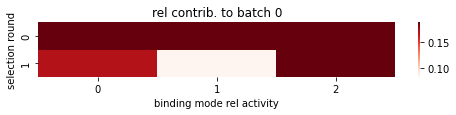


#activities
[[[0.99991006 0.90302694]
  [0.99994445 0.4442673 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.0358, -1.0358]], requires_grad=True)


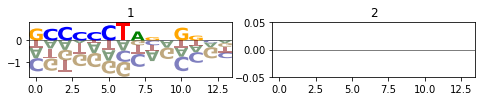

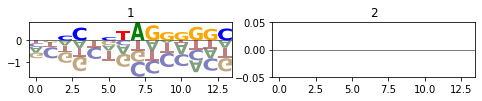

best loss 0.831401836618464

Kernel to optimize 2

FREEZING KERNELS
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 1


before kernel optimization.


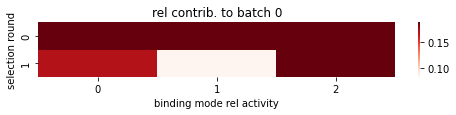


#activities
[[[0.99991006 0.90302694]
  [0.99994445 0.4442673 ]
  [1.         1.        ]]]

#log_etas
Parameter containing:
tensor([[ 1.0358, -1.0358]], requires_grad=True)


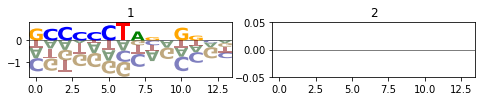

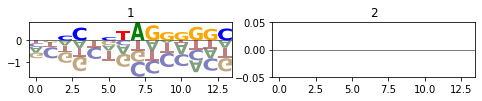

kernels mask [0 0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 10 early_stopping 100
lr= 0.01, weight_decay= 0.001, dir weight= 0
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512

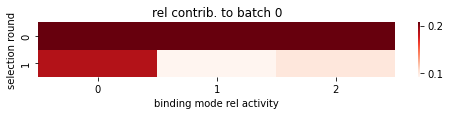


#activities
[[[0.99991006 0.90302694]
  [0.99994445 0.4442673 ]
  [0.99990004 0.4910842 ]]]

#log_etas
Parameter containing:
tensor([[ 1.1983, -1.1983]], requires_grad=True)


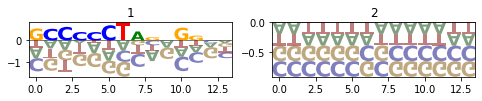

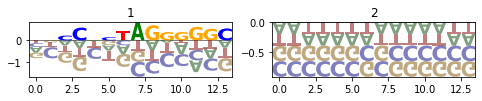

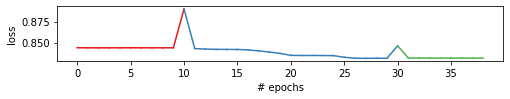

after shift optimz model


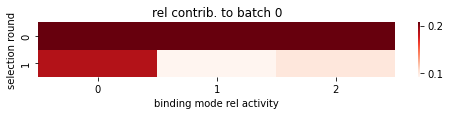


#activities
[[[0.99991006 0.90302694]
  [0.99994445 0.4442673 ]
  [0.99990004 0.4910842 ]]]

#log_etas
Parameter containing:
tensor([[ 1.1983, -1.1983]], requires_grad=True)


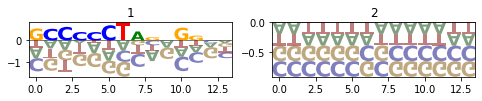

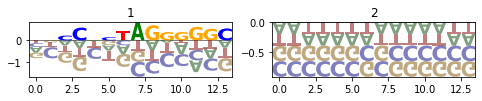

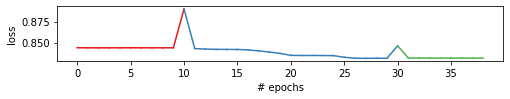




final refinement step (after shift)...

unfreezing all layers for final refinement
kernel grad (0) = 1 
kernel grad (1) = 1 
kernel grad (2) = 1 

kernels mask [0 0 0]
kernels mask [0 0 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'mubind.tl.loss.PoissonLoss'> n_epochs 10 early_stopping 100
lr= 0.01, weight_decay= 0.001, dir weight= 0
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([512, 2])
torch.Size([

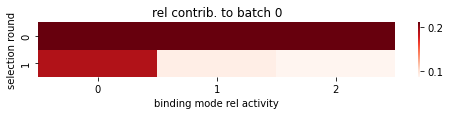


#activities
[[[0.99991006 0.90302694]
  [0.99994445 0.4442673 ]
  [1.         0.41728628]]]

#log_etas
Parameter containing:
tensor([[ 1.1930, -1.1930]], requires_grad=True)


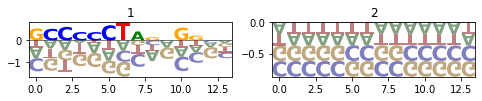

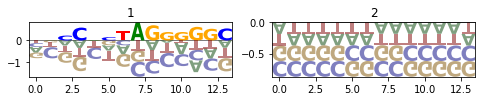

best loss 0.8316083994317562
##DONE....


total time: 729.115 s


In [90]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization = 0
# for dirichlet_regularization_log in range(-5, 3):

n_epochs = 10
log_each = 2
n_kernels = 3

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1

import time
t0 = time.time()

for ignore_kernel in [1]: # [0, 1]:
    print('\n\n##NEW JOB')
    print('ignore kernel', ignore_kernel)
    model_by_k, res_next = mb.tl.train_iterative(train, device, w=14, show_logo=True,
                                                 opt_kernel_shift=False, opt_kernel_length=False,
                                                 dirichlet_regularization=dirichlet_regularization, # 10 ** dirichlet_regularization_log,
                                                 lr=[0.01, 0.01, 0.01, 0.01], weight_decay=[0.01, 0.001, 0.001, 0.001], ignore_kernel=ignore_kernel,
                                                 num_epochs=n_epochs, early_stopping=100, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                 n_kernels=n_kernels, log_each=log_each, stop_at_kernel=None) #  seed=seed) # seeds.index[0]) # 
    print('##DONE....\n\n')

    
print('total time: %.3f s' % ((time.time() - t0)))    
# res = []
# model_by_k = {}


### We can visualize the overall results obtained by the network, once the training is finished

In [91]:
mb.pl.R2_calculation(model_by_k, train)
# 512 = 0.15949761357921344

[0.17783180678375188]